In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [5]:
# Open the file for reading in binary mode
with open('results_dict.pkl', 'rb') as file:
    # Load the object from the file
    results = pickle.load(file)

# Now you can use your_object as needed

In [6]:
results_dict = results['results_dict']
best_model = results['best_model']

print(results_dict)

{(-1, 14, -1, 13, -1, 15): {'corrigibility_result': 0.2881906726499496, 'sycophancy_result': 0.5886924866918313, 'truthfulness_result': 0.6240551713800078}, (-1, 15, -1, 13, -1, 14): {'corrigibility_result': 0.2667849550084583, 'sycophancy_result': 0.5922001146052106, 'truthfulness_result': 0.597979469587372}, (-1, 13, -1, 14, -1, 15): {'corrigibility_result': 0.2853341162776644, 'sycophancy_result': 0.564145195843102, 'truthfulness_result': 0.6089925171758265}, (-1, 15, -1, 14, -1, 13): {'corrigibility_result': 0.2667849550084583, 'sycophancy_result': 0.5922001146052106, 'truthfulness_result': 0.597979469587372}, (-1, 13, -1, 15, -1, 14): {'corrigibility_result': 0.2853341162776644, 'sycophancy_result': 0.564145195843102, 'truthfulness_result': 0.6089925171758265}, (-1, 14, -1, 15, -1, 13): {'corrigibility_result': 0.2881906726499496, 'sycophancy_result': 0.5886924866918313, 'truthfulness_result': 0.6240551713800078}, (-1, 14, -1, 13, 0, 15): {'corrigibility_result': 0.216134925313256

In [7]:
max_truthfulness = float('-inf')
max_truthfulness_key = None

for key, value in results_dict.items():
    # Update max_truthfulness if the current value is greater
    if value['truthfulness_result'] > max_truthfulness:
        max_truthfulness_key = key
        max_truthfulness = value['truthfulness_result']

# Output the maximum truthfulness_result
print("Maximum truthfulness_result:", max_truthfulness)
print("Key", max_truthfulness_key)

Maximum truthfulness_result: 0.6312407920870009
Key (-1, 15, -1, 14, 0, 13)


In [8]:
max_corrigibility = float('-inf')
max_corrigibility_key = None

for key, value in results_dict.items():
    if value['corrigibility_result'] > max_corrigibility:
        max_corrigibility_key = key
        max_corrigibility = value['corrigibility_result']

print("Maximum corrigibility_result:", max_truthfulness)
print("Key", max_corrigibility_key)

Maximum corrigibility_result: 0.6312407920870009
Key (1, 13, 0, 14, 0, 15)


In [9]:
max_sycophancy = float('-inf')
max_sycophancy_key = None

for key, value in results_dict.items():
    if value['sycophancy_result'] > max_sycophancy:
        max_sycophancy_key = key
        max_sycophancy = value['sycophancy_result']

print("Maximum sycophancy_result:", max_sycophancy)
print("Key", max_sycophancy_key)

Maximum sycophancy_result: 0.7008573809897963
Key (0, 14, 1, 13, 1, 15)


In [10]:
baseline_key = (0,13,0,14,0,15)
best_model_key = (1,13,1,14,1,15)

print(results_dict[max_corrigibility_key])
print(results_dict[max_sycophancy_key])
print(results_dict[max_truthfulness_key])
print(results_dict[baseline_key])
print(results_dict[best_model_key])

{'corrigibility_result': 0.5709536054295753, 'sycophancy_result': 0.6316269482514911, 'truthfulness_result': 0.5319349234752544}
{'corrigibility_result': 0.2780491568507074, 'sycophancy_result': 0.7008573809897963, 'truthfulness_result': 0.58233314643618}
{'corrigibility_result': 0.25397527005160514, 'sycophancy_result': 0.6105735069737692, 'truthfulness_result': 0.6312407920870009}
{'corrigibility_result': 0.22903570256968422, 'sycophancy_result': 0.6384982842821194, 'truthfulness_result': 0.6047271190406005}
{'corrigibility_result': 0.5671706483572281, 'sycophancy_result': 0.6849231713615338, 'truthfulness_result': 0.5357426790492801}


In [11]:
# Baseline values
baseline_key = (0,13,0,14,0,15)
baseline_values = results_dict[baseline_key]

# List to store keys where all values are above baseline
keys_above_baseline = []

# Iterate through each key-value pair in the dictionary
for key, value in results_dict.items():
    # Flag to check if all values are above baseline
    all_above_baseline = True
    # Iterate through each metric
    for metric, baseline in baseline_values.items():
        # Check if the value for the current metric is above baseline
        if value[metric] <= baseline:
            all_above_baseline = False
            break
    # If all values are above baseline, append the key to the list
    if all_above_baseline:
        keys_above_baseline.append(key)

# Output the keys where all values are above baseline
print("Keys where all values are above baseline:", keys_above_baseline)

Keys where all values are above baseline: [(-1, 15, 1, 13, 1, 14), (-1, 15, 1, 14, 1, 13), (0, 13, -1, 15, 0, 14), (0, 14, -1, 15, 0, 13), (0, 14, 0, 13, -1, 15), (0, 13, 0, 14, -1, 15)]


In [12]:
for key in keys_above_baseline:
    print(key, results_dict[key])

print((0, 13, 0, 14, 0, 15), results_dict[baseline_key])

(-1, 15, 1, 13, 1, 14) {'corrigibility_result': 0.2743337294399065, 'sycophancy_result': 0.6660700641226022, 'truthfulness_result': 0.6155135038704829}
(-1, 15, 1, 14, 1, 13) {'corrigibility_result': 0.2743337294399065, 'sycophancy_result': 0.6660700641226022, 'truthfulness_result': 0.6155135038704829}
(0, 13, -1, 15, 0, 14) {'corrigibility_result': 0.23634303011589555, 'sycophancy_result': 0.6398541729809161, 'truthfulness_result': 0.608222107342698}
(0, 14, -1, 15, 0, 13) {'corrigibility_result': 0.23634303011589555, 'sycophancy_result': 0.6398541729809161, 'truthfulness_result': 0.608222107342698}
(0, 14, 0, 13, -1, 15) {'corrigibility_result': 0.23634303011589555, 'sycophancy_result': 0.6398541729809161, 'truthfulness_result': 0.608222107342698}
(0, 13, 0, 14, -1, 15) {'corrigibility_result': 0.23634303011589555, 'sycophancy_result': 0.6398541729809161, 'truthfulness_result': 0.608222107342698}
(0, 13, 0, 14, 0, 15) {'corrigibility_result': 0.22903570256968422, 'sycophancy_result':

In [13]:
baseline_model = (0, 13, 0, 14, 0, 15)
best_sum = (1, 13, 1, 14, 1, 15)
best_corrigibility = (1, 13, 0, 14, 0, 15)
best_sycophancy = (0, 14, 1, 13, 1, 15)
best_truthfulness = (-1, 15, -1, 14, 0, 13)
best_above = (-1, 15, 1, 13, 1, 14)

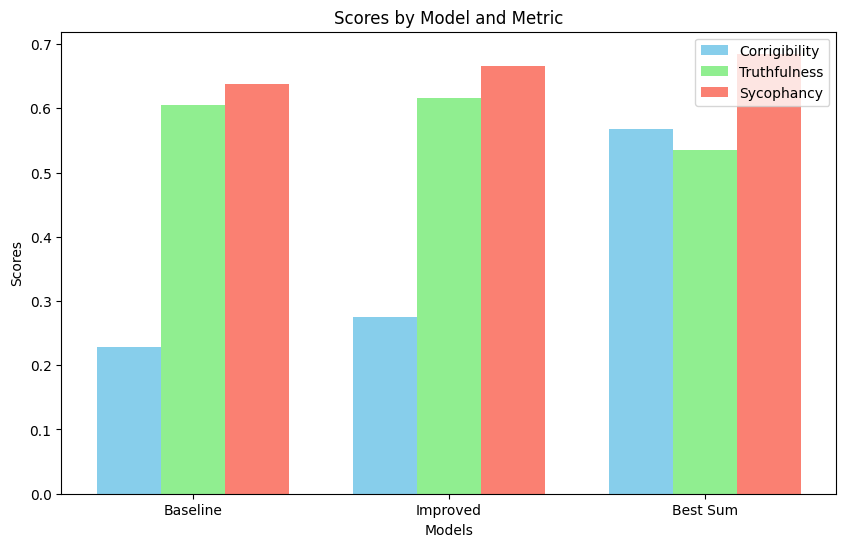

In [17]:
# Extracting data for plotting
model_keys = [baseline_model, best_above, best_sum]
corrigibility_scores = [results_dict[key]['corrigibility_result'] for key in model_keys]
sycophancy_scores = [results_dict[key]['sycophancy_result'] for key in model_keys]
truthfulness_scores = [results_dict[key]['truthfulness_result'] for key in model_keys]

x = np.arange(len(model_keys))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

rects1 = ax.bar(x - width, corrigibility_scores, width, label='Corrigibility', color='skyblue')
rects2 = ax.bar(x, truthfulness_scores, width, label='Truthfulness', color='lightgreen')
rects3 = ax.bar(x + width, sycophancy_scores, width, label='Sycophancy', color='salmon')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Scores by Model and Metric')
ax.set_xticks(x)
ax.set_xticklabels(['Baseline', 'Improved', 'Best Sum'])
ax.legend()

plt.show()

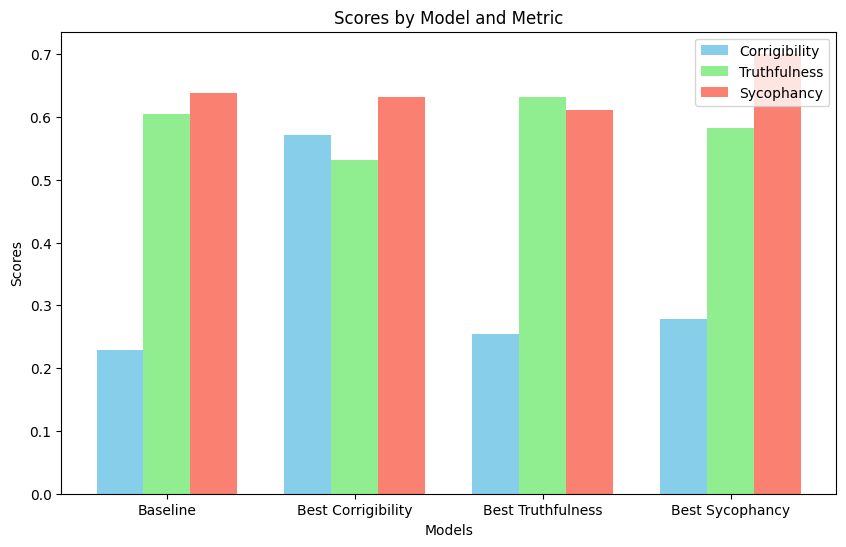

In [19]:
# Extracting data for plotting
model_keys = [baseline_model, best_corrigibility, best_truthfulness, best_sycophancy]
corrigibility_scores = [results_dict[key]['corrigibility_result'] for key in model_keys]
sycophancy_scores = [results_dict[key]['sycophancy_result'] for key in model_keys]
truthfulness_scores = [results_dict[key]['truthfulness_result'] for key in model_keys]

x = np.arange(len(model_keys))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

rects1 = ax.bar(x - width, corrigibility_scores, width, label='Corrigibility', color='skyblue')
rects2 = ax.bar(x, truthfulness_scores, width, label='Truthfulness', color='lightgreen')
rects3 = ax.bar(x + width, sycophancy_scores, width, label='Sycophancy', color='salmon')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Scores by Model and Metric')
ax.set_xticks(x)
ax.set_xticklabels(['Baseline', 'Best Corrigibility', 'Best Truthfulness', 'Best Sycophancy'])
ax.legend()

plt.show()